In [1]:
import cv2                
import numpy as np        
import os                 
from random import shuffle

img_bgr = cv2.imread("dogs-vs-cats/train/cat.49.jpg", 1)

print(type(img_bgr))
print(img_bgr.shape)

<class 'numpy.ndarray'>
(129, 180, 3)


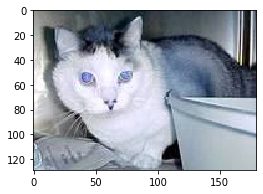

In [3]:
import matplotlib.pyplot as plt

img_bgr = cv2.imread("dogs-vs-cats/train/cat.49.jpg", 1)

plt.figure(figsize=(4,4))
plt.imshow(img_bgr)

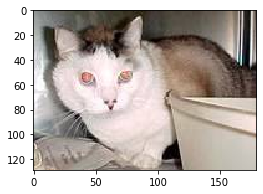

In [4]:
import matplotlib.pyplot as plt

img_bgr = cv2.imread("dogs-vs-cats/train/cat.49.jpg", 1)
im_rgb  = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,4))
plt.imshow(im_rgb)

In [5]:
import cv2                
import numpy as np        
import os                 
from random import shuffle 

TRAIN_DIR = 'dogs-vs-cats/train'
TEST_DIR  = 'dogs-vs-cats/test'
IMG_SIZE  = 50

def get_label(image_name):
    word_label = image_name.split('.')[0]
    
    if word_label == 'cat': 
        return 0
    elif word_label == 'dog': 
        return 1
    
    
# training data
X_train = []
y_train = []


for img_name in os.listdir(TRAIN_DIR):
    label = get_label(img_name)    
    path  = os.path.join(TRAIN_DIR, img_name)

    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

    X_train.append(img)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

np.save('dogs-vs-cats/X_train.npy', X_train)
np.save('dogs-vs-cats/y_train.npy', y_train)



X_test = []
id_test = []
for img in os.listdir(TEST_DIR):
    path   = os.path.join(TEST_DIR,img)
    img_id = img.split('.')[0]

    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

    X_test.append(img)
    id_test.append(img_id)        

X_test  = np.array(X_test)
id_test = np.array(id_test)

np.save('dogs-vs-cats/X_test.npy', X_test)
np.save('dogs-vs-cats/id_test.npy', id_test)

In [8]:
import cv2                
import numpy as np        
import os                 
from random import shuffle 
from tqdm import tqdm 

TRAIN_DIR = 'dogs-vs-cats/train'
TEST_DIR  = 'dogs-vs-cats/test'
IMG_SIZE  = 50

def get_label(image_name):
    word_label = image_name.split('.')[0]
    
    if word_label == 'cat': 
        return 0
    elif word_label == 'dog': 
        return 1
    
    
# training data
X_train = []
y_train = []
for img_name in tqdm(os.listdir(TRAIN_DIR)):
    label = get_label(img_name)
    path  = os.path.join(TRAIN_DIR, img_name)

    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

    X_train.append(img)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

np.save('dogs-vs-cats/X_train.npy', X_train)
np.save('dogs-vs-cats/y_train.npy', y_train)


# testing data
X_test  = []
id_test = []
for img in tqdm(os.listdir(TEST_DIR)):
    path   = os.path.join(TEST_DIR,img)
    img_id = img.split('.')[0]

    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

    X_test.append(img)
    id_test.append(img_id)        

X_test  = np.array(X_test)
id_test = np.array(id_test)

np.save('dogs-vs-cats/X_test.npy', X_test)
np.save('dogs-vs-cats/id_test.npy', id_test)

 55%|█████████████████████████████████████████                                  | 13687/25000 [00:41<00:35, 319.05it/s]

KeyboardInterrupt: 

In [6]:
from PIL import Image
import numpy as np  

X = np.load('dogs-vs-cats/X_test.npy', allow_pickle=True)
print(X.shape)

for i in range(10):
    im = Image.fromarray(X[i].reshape(50,50,3))
    im.save("dogs-vs-cats/image_" + str(i) +".jpg")

(12500, 50, 50, 3)


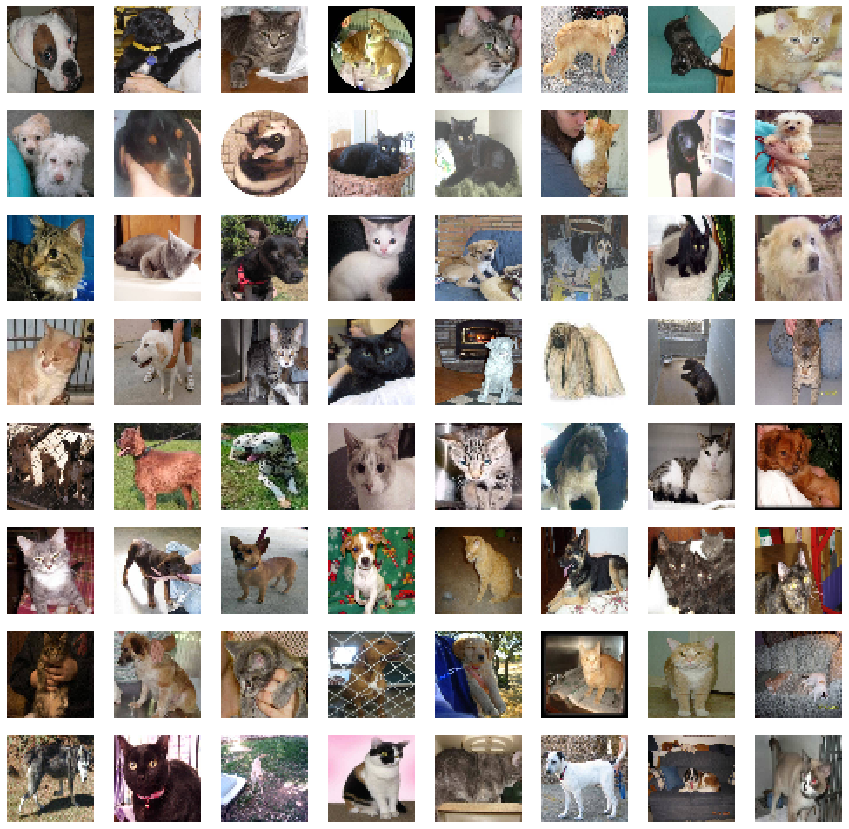

In [7]:
# load images
import matplotlib.pyplot as plt 

X = np.load('dogs-vs-cats/X_train.npy', allow_pickle=True)

# Tạo dang sách 9 phần tử ngẫu nhiên từ m_train có 25000 phần tử
indices = list(np.random.randint(25000, size=64))

fig = plt.figure(figsize=(15,15))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    img = X[indices[i-1]].reshape(50,50,3)
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img)